In [1]:
from cassie import CassieEnv, MyCallbacks
import constants as c 
import functions as f 
import numpy as np
import loader as l 
import caps as cp 
import torch
from ray.tune.registry import register_env
from ray.rllib.agents.ppo import PPOTrainer
import mediapy as media 

DEBUG:matplotlib:matplotlib data path: C:\Users\Ajvendetta\AppData\Roaming\Python\Python310\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32


Device is  cuda


In [2]:
import torch

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda')

In [5]:

logdir = "./logs"
simdir = "./sims"
loader = l.Loader(logdir, simdir)
fps = 40

In [6]:
configs = loader.load_config("ConfigSimplified.yaml")
flattened = {}
for key in configs.keys():
    for key2 in configs[key].keys():
        flattened[key2] = configs[key][key2]

{'training': {'gamma': 0.99, 'lr': 0.0001, 'train_batch_size': 50000, 'model': {'fcnet_hiddens': [256, 256], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 9000, 'num_sgd_iter': 5, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'kl_target': 0.2}, 'environment': {'env': 'cassie-v0', 'disable_env_checking': True}, 'framework': {'framework': 'tf2', 'eager_tracing': True}, 'rollouts': {'recreate_failed_workers': True, 'num_workers': 20, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'observation_filter': 'NoFilter', 'reuse_actors': True}, 'evaluation': {'evaluation_interval': 2, 'evaluation_duration': 10}, 'ressources': {'num_gpus': 1, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0.05}}


In [7]:
register_env("cassie-v0", lambda config: CassieEnv(config))

In [8]:
env = CassieEnv(flattened)
env.reset()

(array([ 3.97695642e-01,  5.02532844e-01,  3.83876599e-01,  8.79215945e-01,
         1.27441459e+00,  5.00028728e-01, -4.08156916e-01,  1.27276102e+00,
         6.04005554e-01,  4.98282487e-01,  3.85214014e-01,  1.19178148e+00,
         1.27490793e+00,  4.99937156e-01, -4.08194900e-01,  1.27277089e+00,
         5.00135504e-01,  5.00105102e-01,  5.00043394e-01,  9.99958909e-01,
         5.25410580e-03, -7.36086269e-03,  6.25940543e-04,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [9]:
caps = cp.CAPSTorchPolicy(env.observation_space, env.action_space, {})

2023-04-25 08:01:50,514	INFO policy.py:1214 -- Policy (worker=local) running on CPU.
2023-04-25 08:01:50,518	INFO torch_policy_v2.py:110 -- Found 1 visible cuda devices.


In [10]:
#load a cassie checkpoint 
config = "testing_configs.yaml"
loader = l.Loader()
config = loader.load_config(config)
Trainer = PPOTrainer
splitted = loader.split_config(config)
combined = {
    **splitted.get("environment", {}),
    **splitted.get("rollouts", {}),
    **splitted.get("checkpointing", {}),
    **splitted.get("debugging", {}),
    **splitted.get("training", {}),
    **splitted.get("framework", {}),
    **splitted.get("resources", {}),
    **splitted.get("evaluation", {}),
}
combined["callbacks"] = MyCallbacks
trainer = Trainer(config=combined, env="cassie-v0")
trainer.restore("Trainer_Policies\checkpoint_001875")

2023-04-25 08:01:50,579	WARNING algorithm_config.py:596 -- Cannot create PPOConfig from given `config_dict`! Property num_cpus not supported.
2023-04-25 08:01:50,579	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='cassie-v0', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('cassie-v0').build()` instead. This will raise an error in the future!
2023-04-25 08:01:50,607	INFO algorithm.py:506 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


{'training': {'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 15000, 'model': {'fcnet_hiddens': [128, 128], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 5000, 'num_sgd_iter': 3, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'vf_clip_param': 1000, 'grad_clip': 100, 'kl_target': 0.01}, 'environment': {'env': 'cassie-v0', 'disable_env_checking': True}, 'framework': {'framework': 'torch'}, 'rollouts': {'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'NoFilter', 'compress_observations': True}, 'evaluation': {'evaluation_interval': 2, 'evaluation_duration': 10}, 'checkpointing': {'export_native_model_files': True}, 'debugging': {'log_sys_usage': False}, 'resources': 

2023-04-25 08:01:52,168	INFO worker.py:1553 -- Started a local Ray instance.
2023-04-25 08:01:58,198	INFO trainable.py:791 -- Restored on 127.0.0.1 from checkpoint: Trainer_Policies\checkpoint_001875
2023-04-25 08:01:58,199	INFO trainable.py:800 -- Current state after restoring: {'_iteration': 1875, '_timesteps_total': None, '_time_total': 22801.8750371933, '_episodes_total': 246383}


(RolloutWorker pid=1936) Device is  cuda


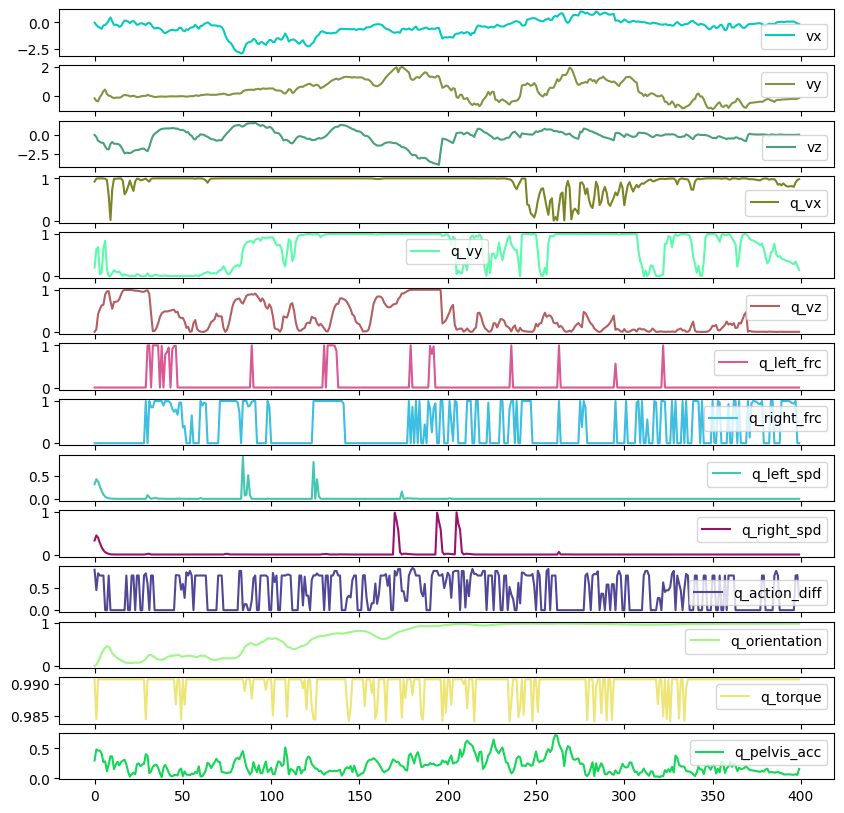

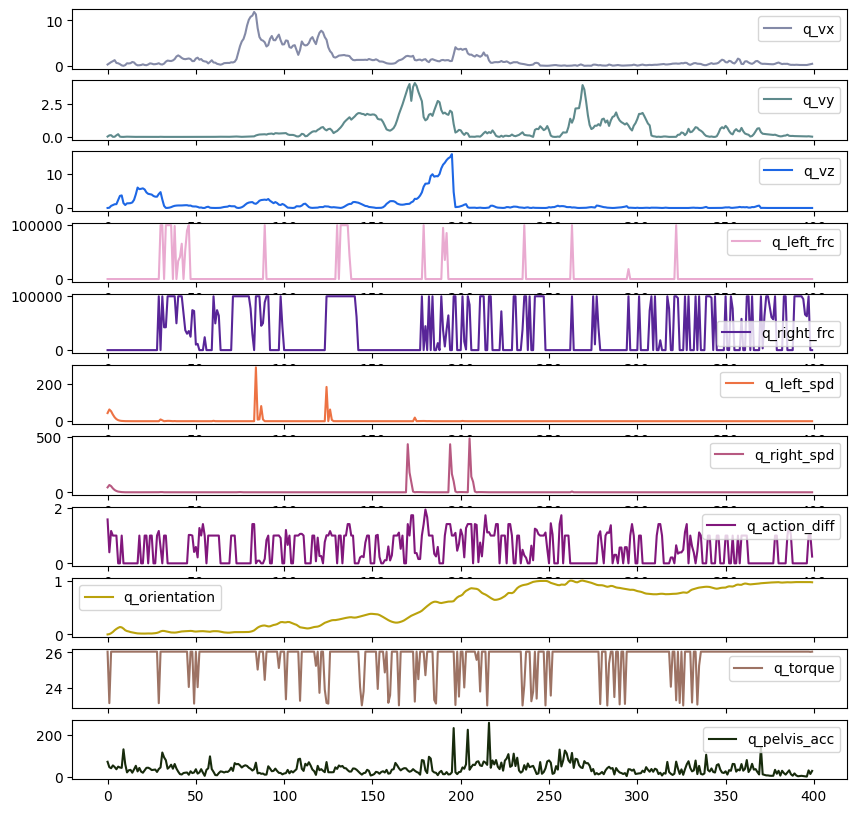

dict_keys(['C_frc_left', 'C_frc_right', 'C_spd_left', 'C_spd_right'])


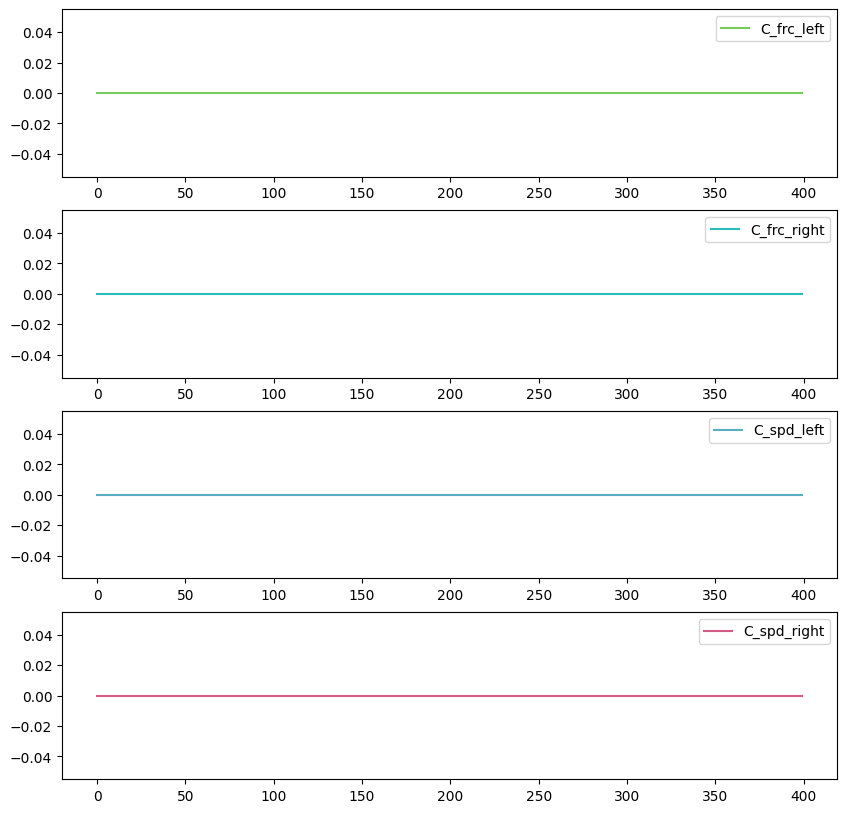

In [17]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
obs,_ = env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
C = {}
exponents = {}
max_steps = 400
number_of_rounds = 4
for i in range(max_steps):
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(C[metric],0,100000), color=s)
    axs[i].legend([metric])

In [ ]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = np.array(train_batch['obs'])
train_batch['actions'] = np.array(train_batch['actions'])


In [ ]:
train_batch['obs'][0]

array([ 2.13885157e-01,  7.37869899e-01,  2.70963079e-01,  8.66373863e-01,
        1.06580511e+00,  4.98529775e-01, -4.09634732e-01,  1.26858883e+00,
        7.84679509e-01,  7.32989037e-01,  4.83831767e-01,  1.16292509e+00,
        1.07529008e+00,  5.01380642e-01, -4.06712764e-01,  1.26877853e+00,
        5.08641445e-01,  5.08700259e-01,  5.01078100e-01,  9.63745008e-01,
        5.21813457e-02, -1.62083916e-01, -2.05429965e-01,  5.58058960e-15,
        1.00000000e+00])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
nn.Linear(25, 10),
nn.ReLU(),
nn.Linear(10, 10),
nn.ReLU(),
nn.Linear(10, 10),
nn.Sigmoid()
).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

print(model)


Sequential(
  (0): Linear(in_features=25, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Sigmoid()
)


In [ ]:
torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_8264\2800571735.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])


tensor([ 9.0000,  9.0000, 24.4000, 24.4000,  1.8000,  9.0000,  9.0000, 24.4000,
        24.4000,  1.8000])

In [ ]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = torch.tensor(train_batch['obs']).float().to(device)
train_batch['actions'] = torch.tensor(train_batch['actions']).float().to(device)

loss = 0 
# get the observations and actions
obs, actions = train_batch["obs"], train_batch["actions"]

logits = model(obs)


#get a bunch of normal distribution around 
dist = torch.distributions.Normal(obs, 0.01 )

around_obs = dist.sample()
print(around_obs)
logits_around = model(around_obs)

print(logits)
print(logits_around)

L_S = torch.mean(torch.mean(torch.abs(logits-logits_around),axis=1))
L_T = torch.mean(torch.abs(actions[1:,:] - actions[:-1,:]))

print(1000*L_S)
print(L_T)
# add the loss of the state around the observations to the loss
loss += L_S
loss += L_T

# Backpropagate and update the model parameters
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss: ", loss.item())

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_8264\3323351765.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  train_batch['obs'] = torch.tensor(train_batch['obs']).float().to(device)


tensor([[ 0.2038,  0.7288,  0.2660,  0.8753,  1.0426,  0.5131, -0.3926,  1.2597,
          0.7562,  0.7197,  0.5233,  1.1169,  1.0508,  0.4958, -0.3905,  1.2667,
          0.5210,  0.5552,  0.5103,  0.9697,  0.0616, -0.1242, -0.1791,  0.2299,
          0.9702],
        [ 0.2607,  0.7432,  0.2775,  0.8590,  1.0458,  0.5115, -0.4164,  1.2834,
          0.7257,  0.6725,  0.5373,  1.0761,  1.0447,  0.4996, -0.3963,  1.2654,
          0.5251,  0.5476,  0.5582,  0.9718,  0.0802, -0.1250, -0.1811,  0.3663,
          0.9491]], device='cuda:0')
tensor([[0.4492, 0.4033, 0.5373, 0.4841, 0.5303, 0.4756, 0.4177, 0.4742, 0.5308,
         0.4217],
        [0.4493, 0.4030, 0.5376, 0.4839, 0.5303, 0.4758, 0.4176, 0.4741, 0.5306,
         0.4217]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[0.4491, 0.4036, 0.5369, 0.4844, 0.5305, 0.4753, 0.4178, 0.4745, 0.5310,
         0.4219],
        [0.4492, 0.4032, 0.5378, 0.4836, 0.5298, 0.4761, 0.4178, 0.4735, 0.5306,
         0.4215]], device='cuda:0'

In [ ]:
loss

tensor(7.0271, device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
env.data.contact

<_MjContactList
  H: array([], shape=(0, 36), dtype=float64)
  dim: array([], dtype=int32)
  dist: array([], dtype=float64)
  efc_address: array([], dtype=int32)
  exclude: array([], dtype=int32)
  frame: array([], shape=(0, 9), dtype=float64)
  friction: array([], shape=(0, 5), dtype=float64)
  geom1: array([], dtype=int32)
  geom2: array([], dtype=int32)
  includemargin: array([], dtype=float64)
  mu: array([], dtype=float64)
  pos: array([], shape=(0, 3), dtype=float64)
  solimp: array([], shape=(0, 5), dtype=float64)
  solref: array([], shape=(0, 2), dtype=float64)
>

In [ ]:
import mujoco as m 

In [ ]:
contact_force_right_foot = np.zeros(6)
m.mj_contactForce(env.model, env.data, 0, contact_force_right_foot)
print(contact_force_right_foot)

[0. 0. 0. 0. 0. 0.]


In [ ]:
env.render_mode = 'rgb_array'

In [ ]:
right_forces = [    
]
left_forces = [
]

In [ ]:
env.reset()

(array([ 0.4036372 ,  0.4956347 ,  0.38343083,  0.87780844,  1.27645759,
         0.50005722, -0.408248  ,  1.27280188,  0.59942665,  0.50258378,
         0.38562973,  1.19235328,  1.26885947,  0.50011199, -0.40828227,
         1.27264992,  0.50004728,  0.49998133,  0.50001627,  0.99995063,
         0.00214842,  0.00932189,  0.00268904,  0.        ,  1.        ]),
 {})

In [ ]:
np.where(env.model.name_bodyadr == 7)

(array([0], dtype=int64),)

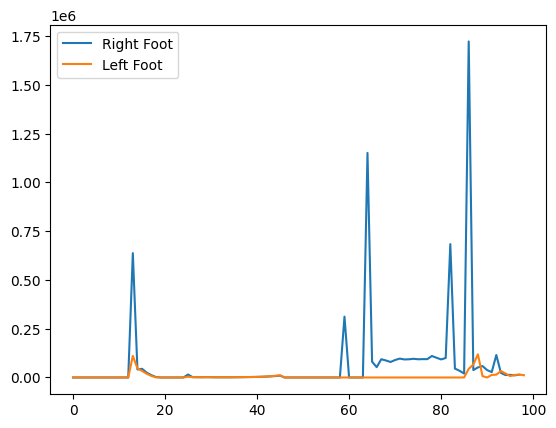

In [ ]:
env.reset()

contact_force_right_foot = np.zeros(6)
frames = []
for i in range(100):
    env.step(np.zeros(10))

    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 0, x)
    right_forces.append(np.linalg.norm(x))
    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 1, x)
    left_forces.append(np.linalg.norm(x))
    frames.append(env.render())
media.show_video(frames,fps = fps)

import matplotlib.pyplot as plt

#remove values that are extremely high
right_forces = [x**2 for x in right_forces if x < 4000]
left_forces = [x**2 for x in left_forces if x < 4000]

plt.plot(right_forces)
plt.plot(left_forces)
plt.legend(["Right Foot", "Left Foot"])
plt.show()

In [ ]:
env.reset()

(array([ 4.03674846e-01,  5.02472806e-01,  3.84681020e-01,  8.79217884e-01,
         1.27247196e+00,  4.99803612e-01, -4.08286165e-01,  1.27272217e+00,
         5.99345209e-01,  4.99328382e-01,  3.83514794e-01,  1.19164002e+00,
         1.27553972e+00,  5.00122667e-01, -4.08307313e-01,  1.27278352e+00,
         5.00128530e-01,  4.99890649e-01,  5.00053062e-01,  9.99942635e-01,
        -3.71782501e-03,  1.10174721e-03, -9.98450538e-03,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [ ]:

contact_force_right_foot = np.zeros(6)
env.step(np.zeros(10))
for j,_ in enumerate(env.data.contact):
    m.mj_contactForce(env.model, env.data, j, contact_force_right_foot)
    print(np.linalg.norm(contact_force_right_foot))

In [ ]:
phases = np.random.rand(10)*2*np.pi

In [ ]:
# phases = np.array([6.18362032, 1.70033932, 4.43265421, 5.00719267, 4.62093139,
#        5.64687259, 2.36063639, 1.51925016, 1.33412746, 3.90058806])

In [ ]:
phases = np.zeros(10)

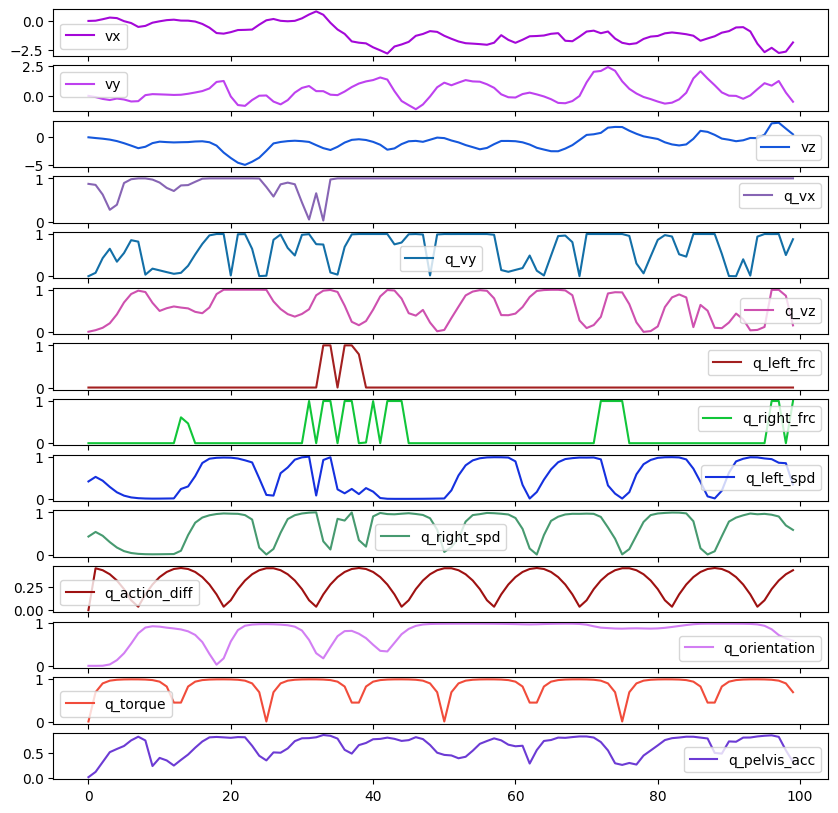

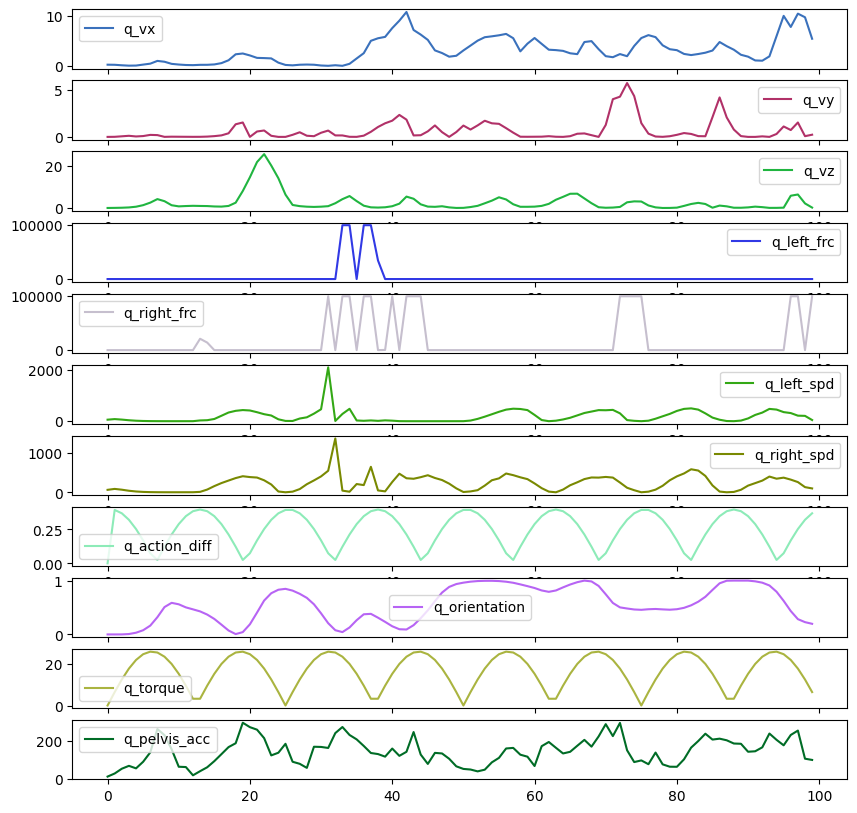

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.sin(number_of_rounds*i/max_steps*2*np.pi+phases)*np.array(list(c.actuator_ranges.values()))[:,1]
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



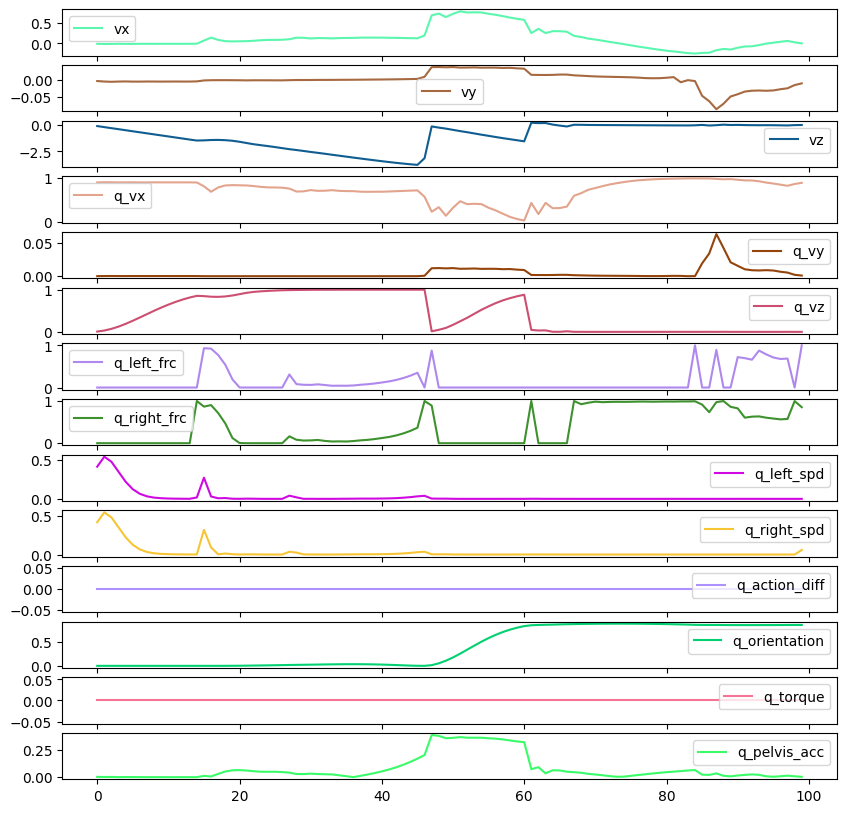

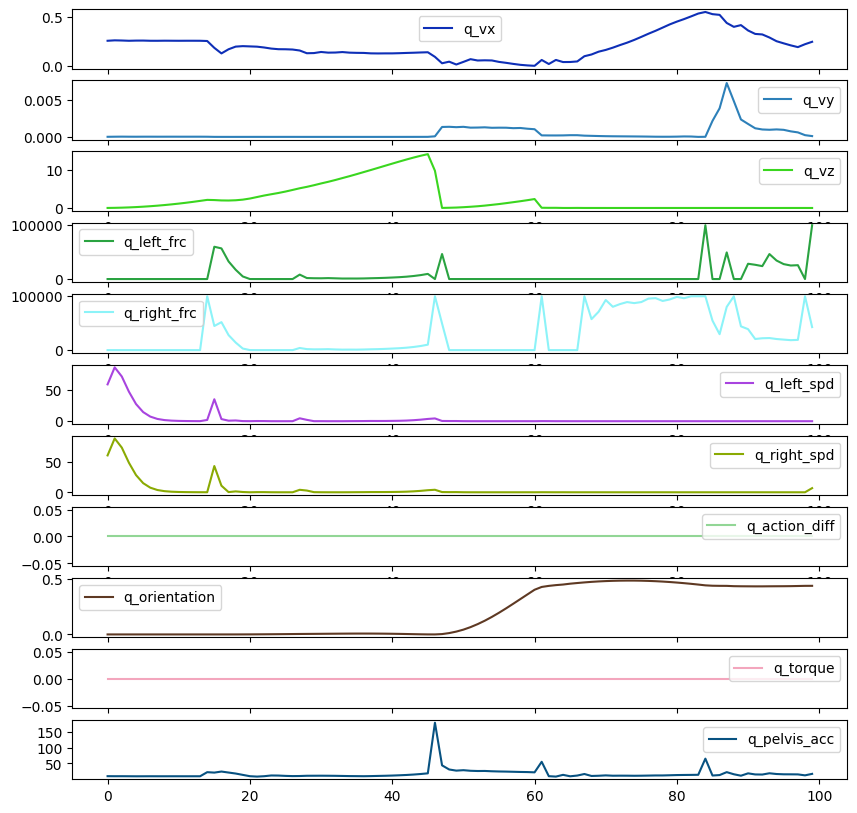

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.zeros(10)
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



In [ ]:
# trainer = PPOTrainer(env = 'cassie-v0',config = flattened)

In [ ]:
trainer.train()

{'evaluation': {'episode_reward_max': 269.216546022851,
  'episode_reward_min': 135.404639854316,
  'episode_reward_mean': 224.69123185804978,
  'episode_len_mean': 157.6,
  'episode_media': {},
  'episodes_this_iter': 10,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mean': {},
  'custom_metrics': {'num_batches_mean': 1.0,
   'num_batches_min': 1,
   'num_batches_max': 1,
   'custom_rewards_r_biped_mean': -0.24774364190716858,
   'custom_rewards_r_biped_min': -0.3377732166546316,
   'custom_rewards_r_biped_max': -0.1420875098224158,
   'custom_rewards_r_cmd_mean': -2.0119871487886813,
   'custom_rewards_r_cmd_min': -2.414823057711857,
   'custom_rewards_r_cmd_max': -1.6242688757427621,
   'custom_rewards_r_smooth_mean': -1.5516513515877393,
   'custom_rewards_r_smooth_min': -1.6083943459384082,
   'custom_rewards_r_smooth_max': -1.485351721964609,
   'custom_quantities_q_vx_mean': 0.9093229351560328,
   'custom_quantities_q_vx_min': 0.8030055388370098,
   'cus